In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-01-12 13:58:52,800: Credentials are already in use. The existing account in the session will be replaced.



Phase Flip Code
----------------


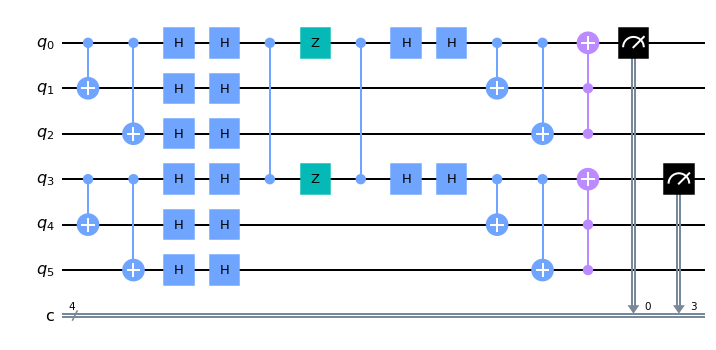

In [14]:
from qiskit import QuantumRegister
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor

print('\nPhase Flip Code')
print('----------------')

backend = provider.get_backend('ibmq_qasm_simulator')

q = QuantumRegister(6,'q')
c = ClassicalRegister(4,'c')

circuit = QuantumCircuit(q,c)

# encoder:
circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])

circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2]) 

circuit.cx(q[3],q[4])
circuit.cx(q[3],q[5])

circuit.h(q[3])
circuit.h(q[4])
circuit.h(q[5]) 


# algorithm:

# circuit.z(q[0]) #Add this to simulate a phase flip error
circuit.h(q[0])
circuit.h(q[3])
circuit.cz([0],[3])
circuit.z(q[0])
circuit.z(q[3])
circuit.cz([0],[3])
circuit.h(q[0])
circuit.h(q[3])




# decoder:
circuit.h(q[0])
circuit.h(q[1])
circuit.h(q[2])

circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])

circuit.h(q[3])
circuit.h(q[4])
circuit.h(q[5]) 
circuit.cx(q[3],q[4])
circuit.cx(q[3],q[5])



circuit.ccx(q[2],q[1],q[0])
circuit.ccx(q[5],q[4],q[3])
circuit.measure(q[0],c[0])
circuit.measure(q[3],c[3])
circuit.draw()

Job Status: job has successfully run

Phase flip code with error
----------------------
{'0000': 1000}


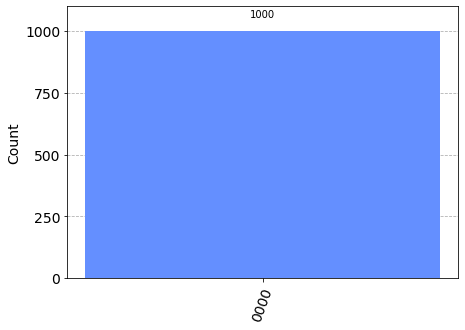

In [16]:
job = execute(circuit, backend, shots=1000)

job_monitor(job)

counts = job.result().get_counts()

print("\nPhase flip code with error")
print("----------------------")
print(counts)
plot_histogram(counts)


Bit Flip Code
----------------


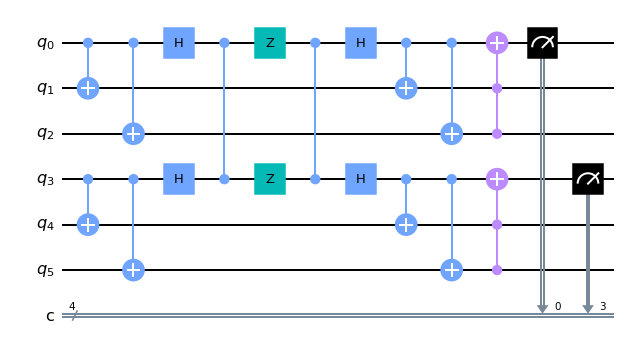

In [17]:
from qiskit import QuantumRegister
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor

print('\nBit Flip Code')
print('----------------')

backend = provider.get_backend('ibmq_qasm_simulator')

q = QuantumRegister(6,'q')
c = ClassicalRegister(4,'c')

circuit = QuantumCircuit(q,c)

# encoder:
circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])

circuit.cx(q[3],q[4])
circuit.cx(q[3],q[5])


# algorithm:

# circuit.z(q[0]) #Add this to simulate a phase flip error
circuit.h(q[0])
circuit.h(q[3])
circuit.cz([0],[3])
circuit.z(q[0])
circuit.z(q[3])
circuit.cz([0],[3])
circuit.h(q[0])
circuit.h(q[3])




# decoder:


circuit.cx(q[0],q[1])
circuit.cx(q[0],q[2])

circuit.cx(q[3],q[4])
circuit.cx(q[3],q[5])



circuit.ccx(q[2],q[1],q[0])
circuit.ccx(q[5],q[4],q[3])
circuit.measure(q[0],c[0])
circuit.measure(q[3],c[3])
circuit.draw()

Job Status: job has successfully run

Bit flip code with error
----------------------
{'0000': 1000}


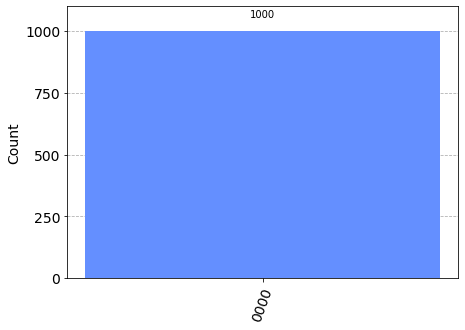

In [18]:
job = execute(circuit, backend, shots=1000)

job_monitor(job)

counts = job.result().get_counts()

print("\nBit flip code with error")
print("----------------------")
print(counts)
plot_histogram(counts)